# Sorting Contours

OpenCV does not provide a function to sort the controus directly. But knowing the bounding boxes and the areas of the contours we can write helper functions which can sort the contours. 

In this example we will look at sorting the detected contours top to bottom and from left to right. 

The helper function is shown below

**"contours are simply the outlines of an object in an image. If the image is simple enough, we might be able to get away with using the grayscale image as an input.**

**But for more complicated images, we must first find the object by using methods such as edge detection or thresholding — we are simply seeking a binary image where white pixels correspond to objects in an image and black pixels as the background. There are many ways to obtain a binary image like this, but the most used methods are edge detection and thresholding"**

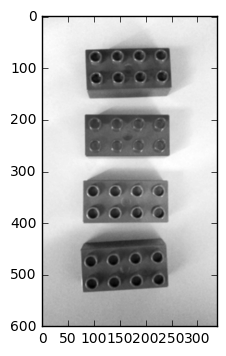

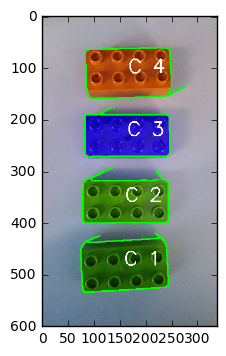

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sort_contours(cnts, method='left-to-right'):
    reverse = False
    i = 0 # i is used to access the x or y coordinate from the bounding box
    
    if method == 'right-to-left' or method == 'bottom-to-top':
        reverse = True
        
    if method == 'bottom-to-top' or method == 'top-to-bottom':
        i=1
        
    boundingbox = [cv2.boundingRect(c) for c in cnts[1]]
    (cnts, boundingbox) = zip(*sorted(zip(cnts[1],boundingbox),
                                      key=lambda b:b[1][i] ,reverse=reverse))
    
    return (cnts,boundingbox)

def draw_centroid(image,c,i):
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone,"C {}".format(i+1),(cX,cY),cv2.FONT_HERSHEY_SIMPLEX,
            1.25, (255, 255, 255), 2)
    
    return image
    

image = cv2.imread('image/lego_blocks_1.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),0)

plt.imshow(blur,cmap='gray')
plt.show()


accumEdged = np.zeros(image.shape[:2], dtype="uint8")
for chan in cv2.split(image):
    # blur the channel, extract edges from it, and accumulate the set
    # of edges for the image
    chan = cv2.medianBlur(chan, 11)
    edged = cv2.Canny(chan, 50, 200)
    accumEdged = cv2.bitwise_or(accumEdged, edged)
 
cnts = cv2.findContours(accumEdged.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

#get the top fixe contours based on their area
#cnts = sorted(cnts[1], key=cv2.contourArea, reverse=True)[:5]

clone = image.copy()
#canvas = np.zeros(image.shape)
for i,c in enumerate(cnts[1]):
    cv2.drawContours(clone,[c],-1,(0,255,0),2)
    draw_centroid(clone,c,i)
    
    
plt.imshow(clone)
plt.show()

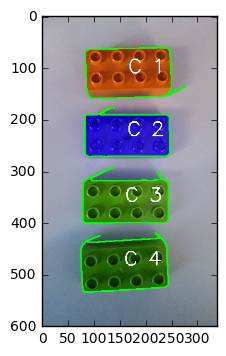

In [15]:
(cnts,boundingbox) = sort_contours(cnts,method='top-to-bottom')

clone = image.copy()
#canvas = np.zeros(image.shape)
for i,c in enumerate(cnts):
    cv2.drawContours(clone,[c],-1,(0,255,0),2)
    draw_centroid(clone,c,i)
    
    
plt.imshow(clone)
plt.show()